# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#pip install --upgrade scikit-learn

In [218]:
# Import your libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [5]:
websites = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 17\supervised-learning-classification\data\website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [6]:
print(websites.shape)
websites.head()

(1781, 21)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [7]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [8]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [9]:
# Looking at the data types, it seems that WHOIS_REGDATE and WHOIS_UPDATED_DATE have the wrong data type (it should be datetime, not object).
# It seems that the column Type is our target variable as 1 and 0 should stant for categories 'malicious' and 'not-malicious'.
# There are a lot of Nans in CONTENT_LENGHT that need to be dealt with. Are those the only nans? 
# Nans are float type values, but I have a lot of object type columns, so I will check for 'None' string values across the dataframe.

<Axes: >

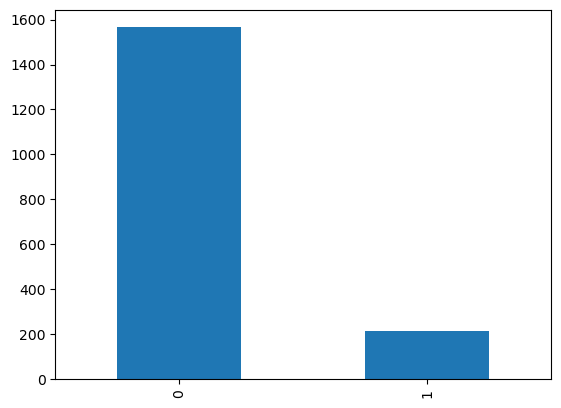

In [10]:
# Look at how balanced are the classes we want to predict.
count_types = pd.value_counts(websites['Type'])
count_types.plot(kind='bar')

In [11]:
# Here I am filtering by checking for rows that contains 'None' and displaying the rows itself only with '.any(axis=1) 
# Without .any() I would have had a boolean df with the same shape of websites and False and True values in each cell as results of the "'None'-hunting-condition".
websites[websites.applymap(lambda value: value == 'None').any(axis=1)]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,B0_216,145,31,UTF-8,None,38361.0,US,NY,10/08/1995 0:00,5/08/2016 0:00,10,3,3,1354,18,19,2517,2010,18,8.0,0
1763,B0_1361,149,23,ISO-8859-1,None,6748.0,CA,Quebec,8/01/1997 0:00,2/06/2009 0:00,0,0,0,0,0,0,0,0,0,0.0,0
1766,B0_755,154,21,UTF-8,None,11104.0,US,UT,29/07/1998 4:00,17/03/2016 4:34,33,10,8,3764,41,23,7356,4412,41,8.0,0
1768,B0_62,160,29,UTF-8,None,36829.0,US,CA,14/08/1997 0:00,14/06/2016 0:00,19,3,7,2402,25,22,4491,2900,25,6.0,0


In [12]:
# There are 522 rows with 'None' values to deal with.
# Before dealing with Nans and 'None's, I will check each column.

In [13]:
websites.URL.nunique()

1781

In [14]:
# The URL is a unique identifier of each website, so I will drop this column before modeling,
# because it does not help in any way to predict the target variables and it creates problems in categorizing.

In [15]:
websites.URL_LENGTH.unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120,
       122, 123, 124, 125, 126, 128, 129, 131, 132, 134, 135, 136, 137,
       139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 154, 156,
       160, 161, 169, 170, 173, 178, 183, 194, 198, 201, 234, 249],
      dtype=int64)

In [16]:
websites.NUMBER_SPECIAL_CHARACTERS.unique()

array([ 7,  6,  5,  8,  9, 11, 10, 13, 12, 14, 15, 16, 17, 18, 21, 19, 20,
       22, 23, 28, 24, 25, 36, 26, 27, 43, 30, 29, 31, 34, 40],
      dtype=int64)

In [17]:
# URL_LENGTH and NUMBER_SPECIAL_CHARACTERS are websites parameters with numerical values (int).
# We could check if there is some correlation between the numbers of characters and special characters in the URL and the malignant/non-malignant categories.

In [18]:
websites.CHARSET.value_counts() # This stands for the character encoding for the website. We see the first 'None' istances.

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [19]:
websites.SERVER.unique() # Here it seems we could group values by using string patterns and reduce the unique values.

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [20]:
websites.SERVER.value_counts().head(10) # Ee could group the values into 'Apache', 'nginx', 'Microsoft' and group the rest under 'Others'.

Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Microsoft-IIS/7.5         51
Server                    49
GSE                       49
YouTubeFrontEnd           42
nginx/1.12.0              36
Name: SERVER, dtype: int64

In [21]:
websites.CONTENT_LENGTH.value_counts()

324.0      138
1819.0      20
2516.0      13
162.0       12
345.0       11
          ... 
226.0        1
217.0        1
4695.0       1
636.0        1
24435.0      1
Name: CONTENT_LENGTH, Length: 637, dtype: int64

In [22]:
websites[pd.isna(websites.CONTENT_LENGTH)] # Almost half of the total rows have nans under CONTENT_LENGHT. This makes me think that we could remove the column.

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1
10,B0_1013,20,6,utf-8,Apache,NaN,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,0,0,0,0,0,0,0,0,0,0.0,0
20,B0_161,22,6,utf-8,openresty/1.11.2.1,NaN,US,CA,3/07/1999 0:00,7/08/2015 0:00,39,29,6,3833,43,42,22495,4125,43,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,M4_39,178,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1775,M4_45,194,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1


In [23]:
websites.WHOIS_COUNTRY.unique() # Some values should be changed and grouped together (UK, United Kingdom [uGB...]; SE and se; RU and ru)

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [24]:
websites.WHOIS_STATEPRO.unique() # This information seems redundant as states and provinces are already grouped under WHOIS_COUNTRY, so I would drop the column.

array(['None', 'AK', 'TX', 'Mahe', 'CO', 'FL', 'Kansas',
       'Novosibirskaya obl.', 'CA', 'Tennessee', 'Vi', 'OR', 'Texas',
       'ALBERTA', 'PANAMA', 'Arizona', 'WI', 'Oregon', 'Andhra Pradesh',
       'AB', 'Tamil Nadu', 'VA', 'NY', 'quebec', 'MA', 'ON', 'New Mexico',
       'British Columbia', 'Massachusetts', 'California', 'bangkok',
       'WEST MIDLANDS', 'TEXAS', 'WC1N', 'Kentucky', 'MD', 'NEW YORK',
       'Washington', 'Colorado', 'PA', 'LA', 'WA', 'Queensland', 'MOSCOW',
       'UK', 'P', 'NH', 'Pennsylvania', 'UTTAR PRADESH', 'NC', 'kireka',
       'IL', 'Missouri', 'Osaka', 'QC', 'Michigan', 'Maryland', 'Ontario',
       'South Carolina', 'Zhejiang', 'New York', 'QLD', 'NJ', 'GA', 'MO',
       'HR', 'ab', 'Greater London', 'Illinois', '--', 'Fukuoka', 'BC',
       'AL', 'Krasnoyarsk', 'MAINE', 'Virginia', 'MH', 'GRAND CAYMAN',
       'Austria', 'DE', 'shandong', 'AZ', 'PRAHA', 'beijingshi',
       'liaoningsheng', 'North Carolina', 'OH', 'Manila', 'Utah', 'MI',
       '

In [25]:
print(websites.WHOIS_REGDATE.nunique())
websites.WHOIS_REGDATE.value_counts().head()

891


None               127
17/09/2008 0:00     62
13/01/2001 0:12     59
31/07/2000 0:00     47
15/02/2005 0:00     41
Name: WHOIS_REGDATE, dtype: int64

In [26]:
print(websites.WHOIS_UPDATED_DATE.nunique())
websites.WHOIS_UPDATED_DATE.value_counts().head()

594


None                139
2/09/2016 0:00       64
12/12/2015 10:16     59
29/06/2016 0:00      47
14/01/2017 0:00      42
Name: WHOIS_UPDATED_DATE, dtype: int64

In [27]:
# Besides having the wrong data type, I am also not so sure that these columns are useful for our purpose (=build a model that classifies malignant and non-malignant websites).
# The registration date and the date of the last update are not relevant for that, so I would drop both columns.

In [28]:
for column in list(websites.columns):
    print(f'Number of unique values in {column}: ', websites[column].nunique(), websites[column].dtype)

Number of unique values in URL:  1781 object
Number of unique values in URL_LENGTH:  142 int64
Number of unique values in NUMBER_SPECIAL_CHARACTERS:  31 int64
Number of unique values in CHARSET:  9 object
Number of unique values in SERVER:  239 object
Number of unique values in CONTENT_LENGTH:  637 float64
Number of unique values in WHOIS_COUNTRY:  49 object
Number of unique values in WHOIS_STATEPRO:  182 object
Number of unique values in WHOIS_REGDATE:  891 object
Number of unique values in WHOIS_UPDATED_DATE:  594 object
Number of unique values in TCP_CONVERSATION_EXCHANGE:  103 int64
Number of unique values in DIST_REMOTE_TCP_PORT:  66 int64
Number of unique values in REMOTE_IPS:  18 int64
Number of unique values in APP_BYTES:  825 int64
Number of unique values in SOURCE_APP_PACKETS:  113 int64
Number of unique values in REMOTE_APP_PACKETS:  116 int64
Number of unique values in SOURCE_APP_BYTES:  885 int64
Number of unique values in REMOTE_APP_BYTES:  822 int64
Number of unique valu

In [29]:
# I am trying to understand the values of the columns from TCP_CONVERSATION_EXCHANGE to DNS_QUERY_TIMES.
# They are all numerical columns with very different ranges of numerical values. 
# I guess that they could all be relevantly correlated to our target feature, but I cannot tell now before further analysis.

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [30]:
websites_numeric = websites.select_dtypes(include='number')
websites_numeric.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


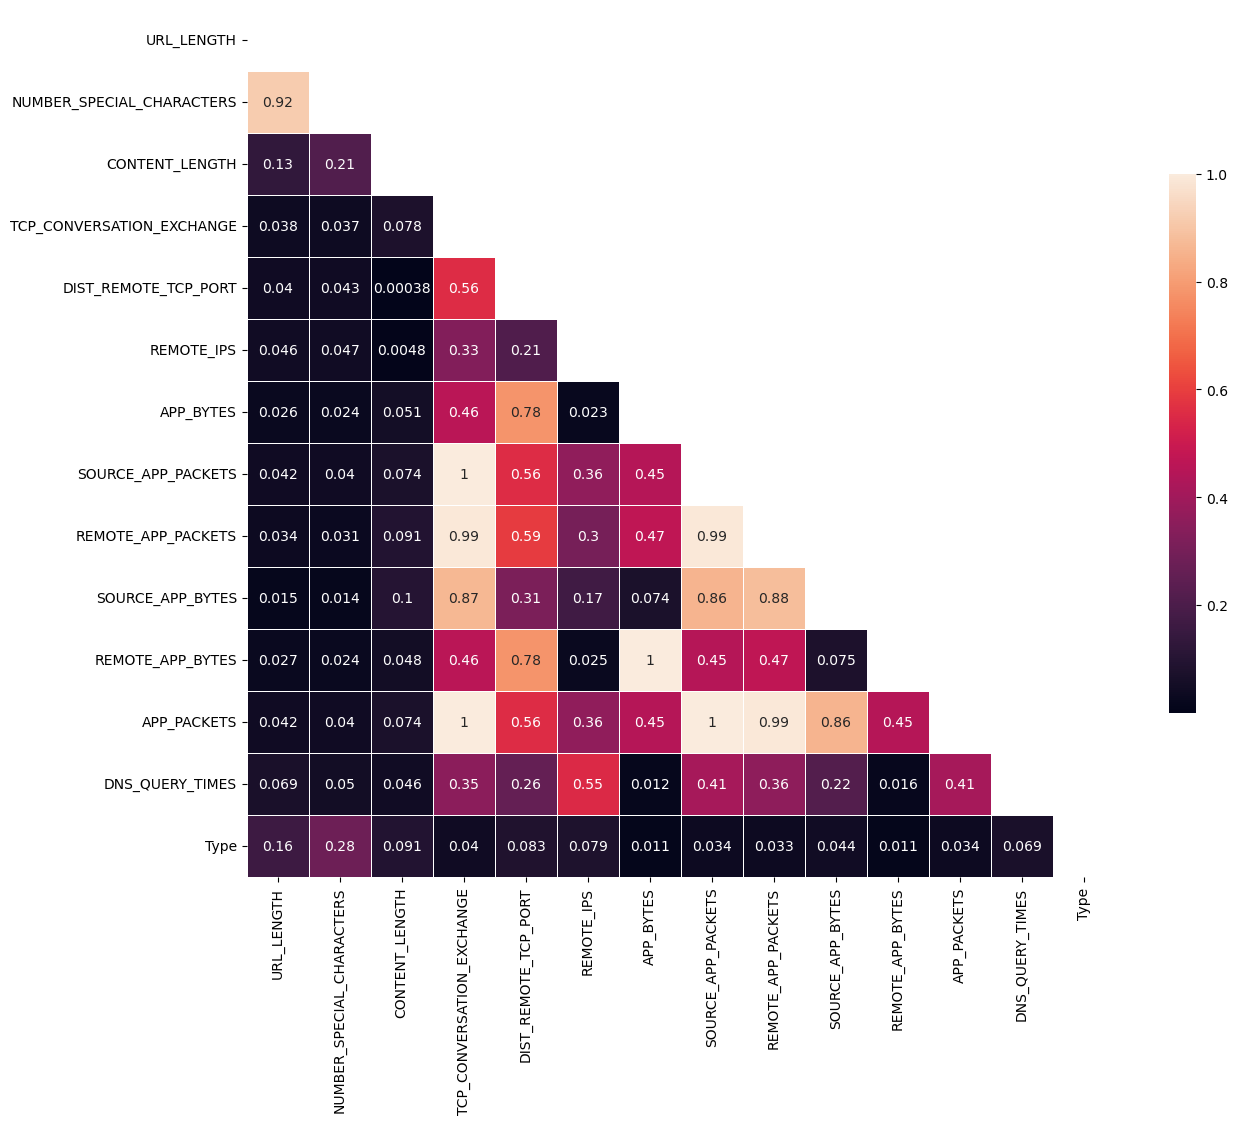

In [31]:
corr=np.abs(websites_numeric.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [32]:
# At first glance I see the following strong correlations:
# APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_PACKETS are strongly correlated with each other; 
# APP_BYTES and REMOTE_APP_BYTES as well.
# I will try to remove SOURCE_APP_PACKETS and REMOTE_APP_BYTES first and then REMOTE_APP_PACKETS after checkig the matrix.

In [33]:
websites_numeric.drop(columns={'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES'}, inplace=True, axis=1)

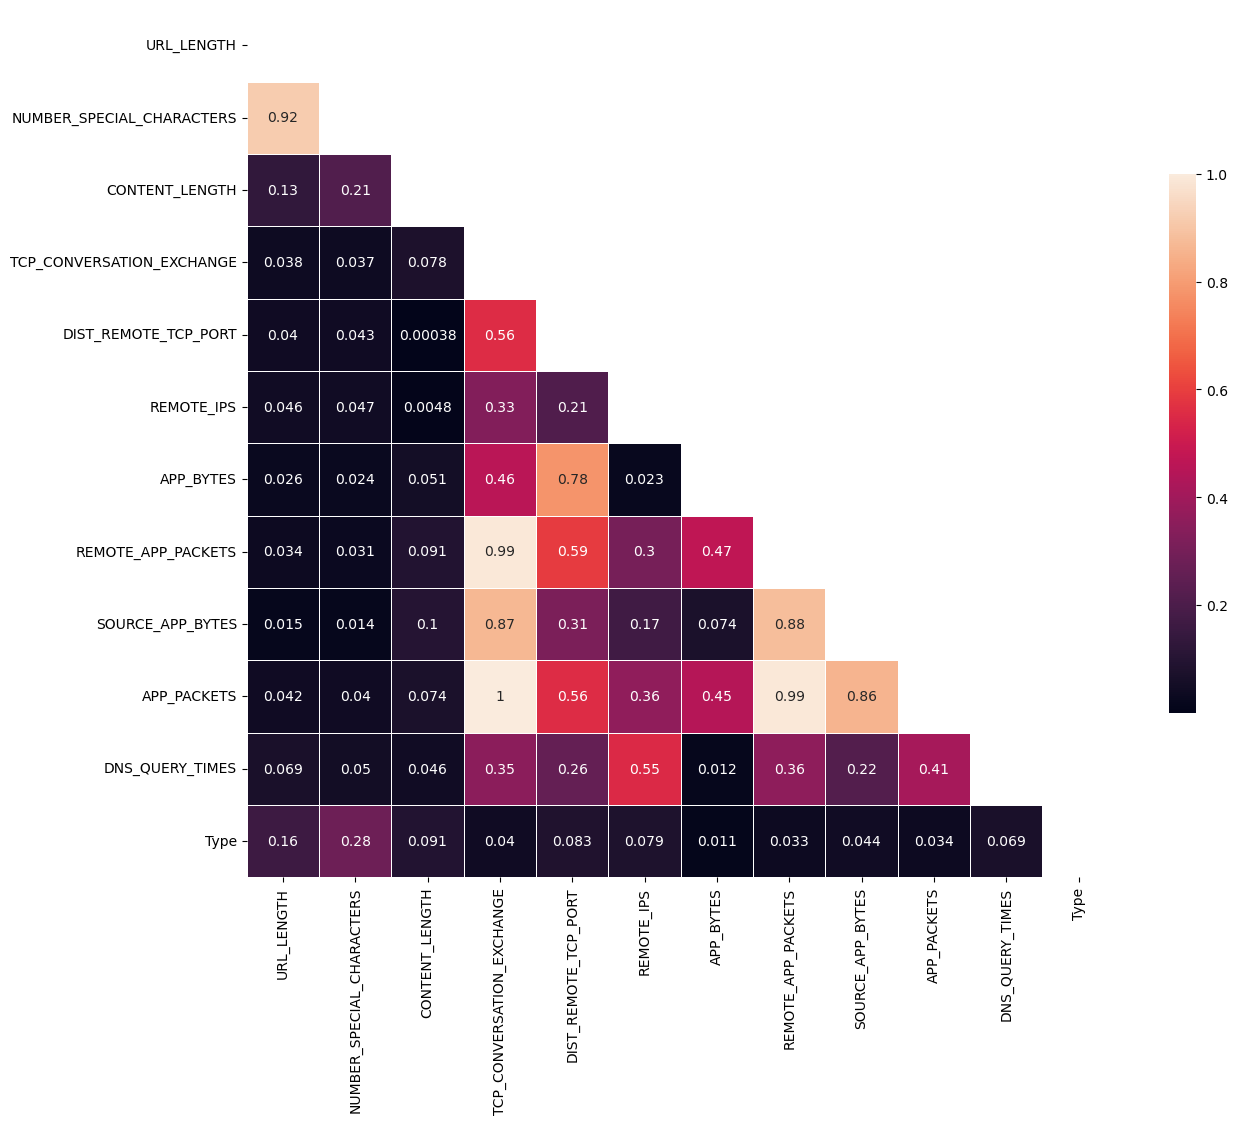

In [34]:
# Print heatmap again
corr=np.abs(websites_numeric.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

In [35]:
websites_numeric.drop(columns={'REMOTE_APP_PACKETS'}, inplace=True, axis=1)

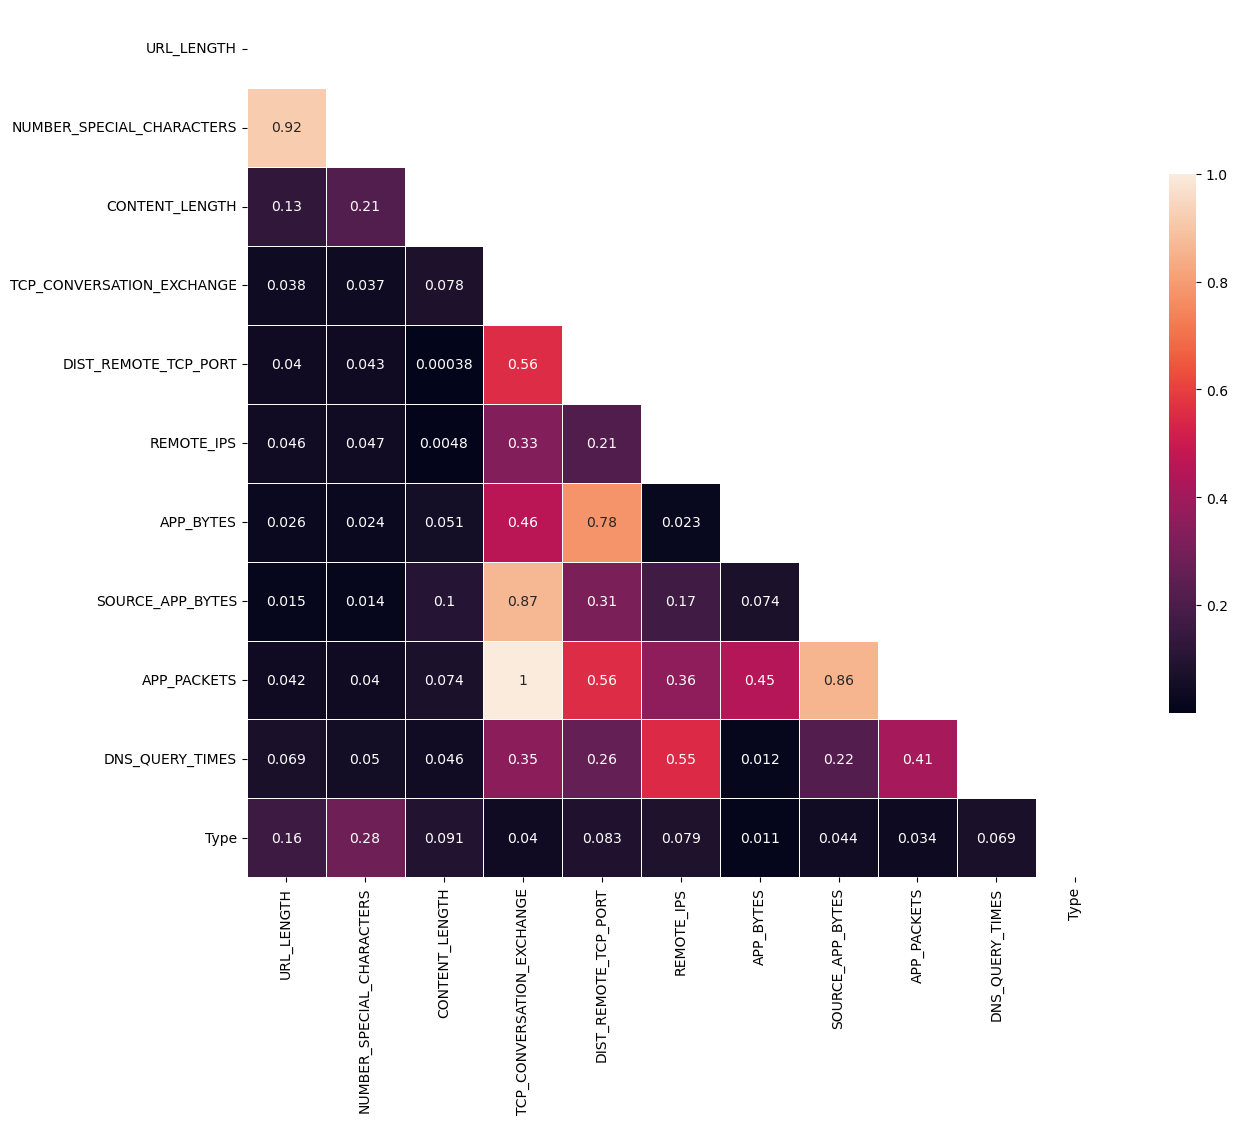

In [36]:
# Print heatmap again
corr=np.abs(websites_numeric.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

In [37]:
# There are other two strong correlations between:
# APP_PACKETS and TCP_CONVERSATION_EXCHANGE and also URL_LENGHT and NUMBER_SPECIAL_CHARACTERS have a correlation above 0.92.

In [38]:
websites_numeric.drop(columns={'TCP_CONVERSATION_EXCHANGE', 'NUMBER_SPECIAL_CHARACTERS'}, inplace=True, axis=1)

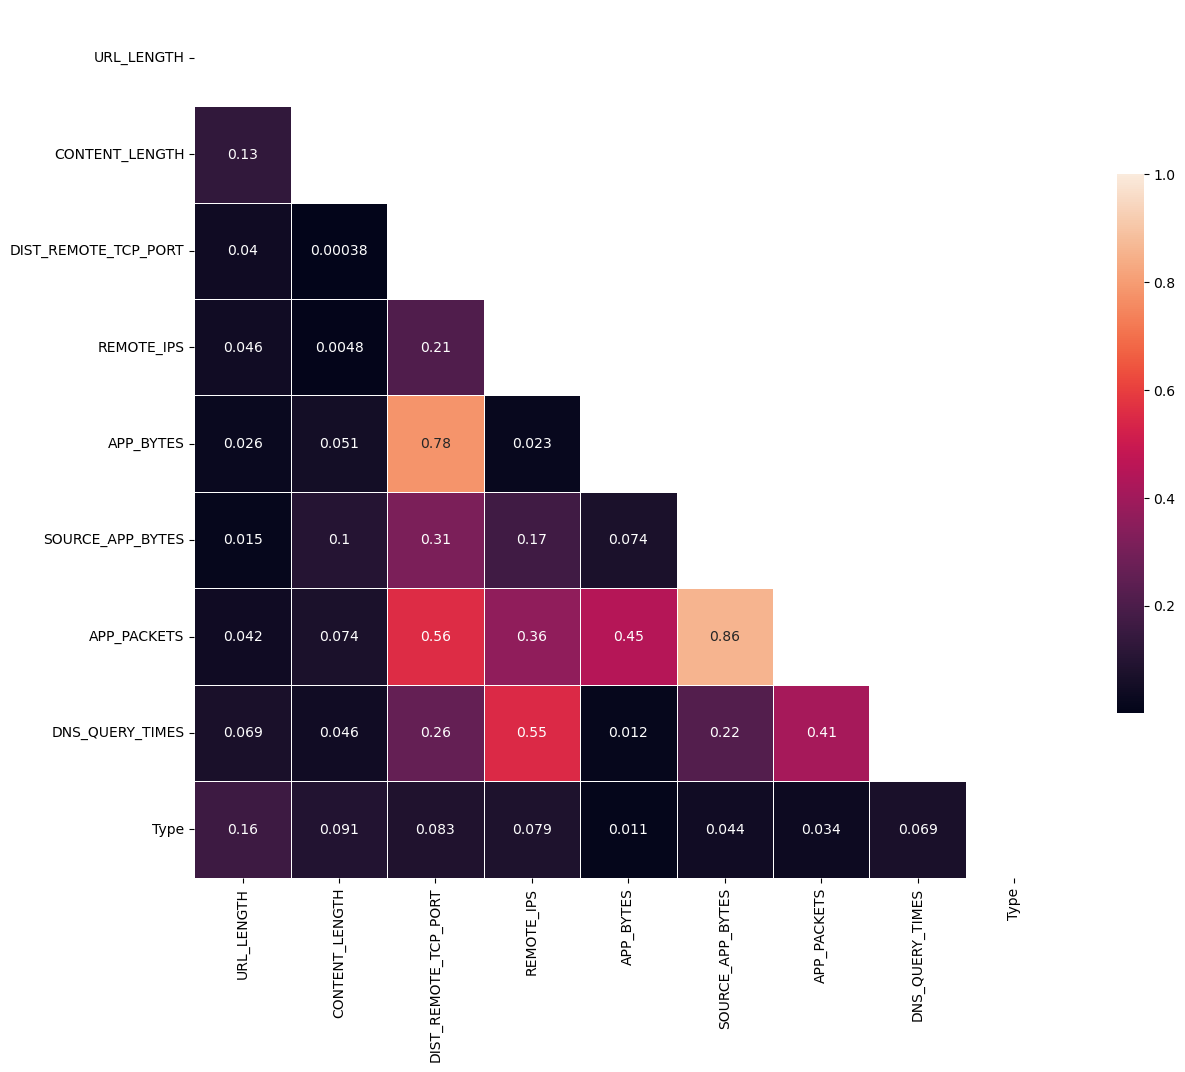

In [39]:
# Print heatmap again
corr=np.abs(websites_numeric.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

In [40]:
# Since we are going to use the categorical columns as well, we want to drop the collinear columns in the original dataframe as well.
websites.drop(columns={'SOURCE_APP_PACKETS', 
                       'REMOTE_APP_BYTES', 
                       'REMOTE_APP_PACKETS', 
                       'TCP_CONVERSATION_EXCHANGE', 
                       'NUMBER_SPECIAL_CHARACTERS'},
inplace=True, axis=1)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [41]:
# Analysis partly done in challenge 1:
websites.isna().sum()


URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [42]:
# As I thought before - see comments in challenge 1 -, it makes sense for me to remove the CONTENT_LENGTH column because of the huge Nans number.
websites.drop(columns={'CONTENT_LENGTH'}, inplace=True, axis=1)

In [43]:
# Your comment here
websites[websites.SERVER.isna()]

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,66,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,1026,246,15,0.0,0


In [44]:
websites.SERVER.unique() 
# I will group these values under macro-categories, one of which will be 'Others'. 
# Since the only row with NaN in this column has other relevant information, I will fill the NaN with 'Others'.

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [45]:
websites.SERVER.fillna('Other', inplace=True)

In [46]:
websites[websites.DNS_QUERY_TIMES.isna()]

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1659,B0_772,101,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,276,416,4,NaN,0


In [47]:
# In this case I have no clue what the missing value in DNS_QUERY_TIMES could be. 
# I will drop the row, since it is just 1 with NaN under this column.
websites.drop(1659, inplace=True)

In [48]:
websites.isna().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

In [49]:
# The 'proper' Nans are gone. Let's look at the strings 'None'.
websites[websites.applymap(lambda value: value == 'None').any(axis=1)]

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,1153,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,1265,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
4,B0_403,17,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,129889,61,4.0,0
8,M2_17,20,utf-8,nginx/1.10.1,None,None,8/11/2014 7:41,None,0,0,0,213,2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,B0_216,145,UTF-8,None,US,NY,10/08/1995 0:00,5/08/2016 0:00,3,3,1354,2517,18,8.0,0
1763,B0_1361,149,ISO-8859-1,None,CA,Quebec,8/01/1997 0:00,2/06/2009 0:00,0,0,0,0,0,0.0,0
1766,B0_755,154,UTF-8,None,US,UT,29/07/1998 4:00,17/03/2016 4:34,10,8,3764,7356,41,8.0,0
1768,B0_62,160,UTF-8,None,US,CA,14/08/1997 0:00,14/06/2016 0:00,3,7,2402,4491,25,6.0,0


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [50]:
# So, there are 522 rows with 'None' in at least one cell. Let's identify which columns have the most 'None's. 
# All numerical columns should be clear, and we should see them only in the categorical ones.
for column in websites.columns:
    print(f"Number of rows containing None in {column}: , {(websites[websites[column] == 'None'].any(axis=1)).sum()}, column type is: , {websites[column].dtype}")

Number of rows containing None in URL: , 0, column type is: , object
Number of rows containing None in URL_LENGTH: , 0, column type is: , int64
Number of rows containing None in CHARSET: , 7, column type is: , object
Number of rows containing None in SERVER: , 175, column type is: , object
Number of rows containing None in WHOIS_COUNTRY: , 306, column type is: , object
Number of rows containing None in WHOIS_STATEPRO: , 362, column type is: , object
Number of rows containing None in WHOIS_REGDATE: , 127, column type is: , object
Number of rows containing None in WHOIS_UPDATED_DATE: , 139, column type is: , object
Number of rows containing None in DIST_REMOTE_TCP_PORT: , 0, column type is: , int64
Number of rows containing None in REMOTE_IPS: , 0, column type is: , int64
Number of rows containing None in APP_BYTES: , 0, column type is: , int64
Number of rows containing None in SOURCE_APP_BYTES: , 0, column type is: , int64
Number of rows containing None in APP_PACKETS: , 0, column type 

In [51]:
# As I expected Nones are in the categorical columns. When dealing with them in the next challenge, I will also decide how to handle these values.

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [52]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [53]:
country_mapping = {"[u'GB'; u'UK']" : 'UK', 
                   'United Kingdom' : 'UK',
                   'ru' : 'RU',
                   'Cyprus' : 'CY',
                   'se' : 'SE',
                   'us' : 'US'
}

# with enumerate I can iterate trough both indexes and values of the column
for i, value in enumerate(websites['WHOIS_COUNTRY']):
    if value in country_mapping: # This ensures that the mapping happens only for the values identified in the dictionary
        websites.at[i, 'WHOIS_COUNTRY'] = country_mapping[value]

In [54]:
# The map function would be a good option for columns with less unique values, because to make it work every unique value should be included in the mapping dictionary.
# websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].map(country_mapping)

In [55]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG',
       'us'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

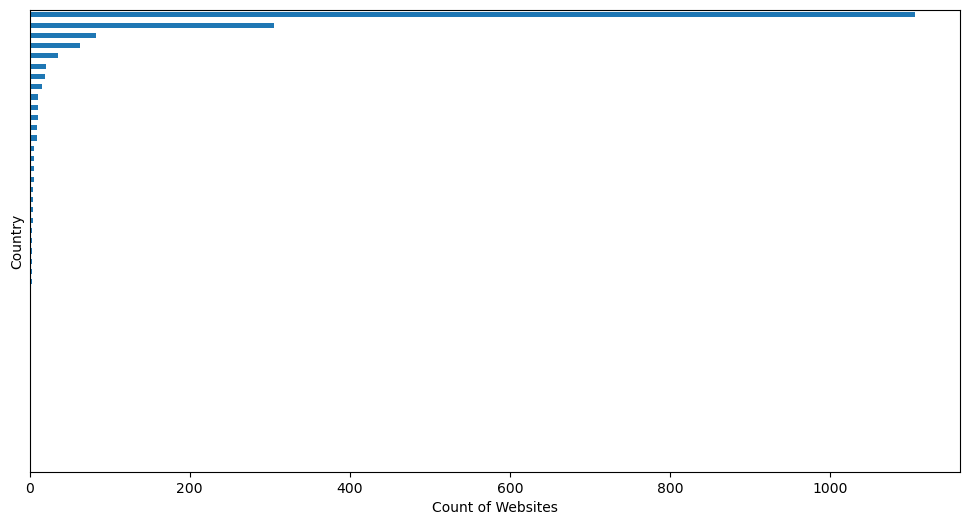

In [56]:
plt.figure(figsize=(12, 6))

websites.WHOIS_COUNTRY.value_counts(ascending=True).plot(kind='barh')

plt.yticks([])
plt.xlabel('Count of Websites')
plt.ylabel('Country')
plt.show()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [57]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda value: value if value in websites.WHOIS_COUNTRY.value_counts().head(10) else 'Other')

In [58]:
websites.WHOIS_COUNTRY.value_counts()

US       1106
None      305
Other     111
CA         83
ES         63
AU         35
PA         21
GB         19
UK         16
JP         11
CN         10
Name: WHOIS_COUNTRY, dtype: int64

In [59]:
# Do I want to replace None with Other?
websites.WHOIS_COUNTRY.replace('None', 'Other', inplace=True)

In [60]:
websites.WHOIS_COUNTRY.value_counts()

US       1106
Other     416
CA         83
ES         63
AU         35
PA         21
GB         19
UK         16
JP         11
CN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [61]:
websites.drop(columns={'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'}, inplace=True, axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [62]:
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [63]:
websites.drop(columns={'URL'}, inplace=True, axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [64]:
websites.CHARSET.value_counts()

UTF-8           675
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [65]:
#I already thought about this column. I think that I should re-group the servers under 4 categories by looking at string pattern (Apache, nginx, Microsoft, Other)
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [66]:
import re
# Create a regex pattern for the 3 main servers
pattern = 'Microsoft|Apache|nginx'
# Use regex to tranform in 'Other' SERVER values not containing any string in the pattern or to uniform each string to the corresponding pattern (re.search(...).group())
websites.SERVER = websites.SERVER.apply(lambda server: re.search(pattern, server).group() if re.search(pattern, server) else 'Other')

In [67]:
# Count `SERVER` value counts
websites.SERVER.value_counts()

Apache       642
Other        505
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [68]:
websites.dtypes

URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

In [69]:
website_dummy = pd.get_dummies(websites[['CHARSET', 'SERVER', 'WHOIS_COUNTRY']], drop_first=True)
website_dummy.head()

,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [70]:
website_dummy.dtypes

CHARSET_ISO-8859-1      uint8
CHARSET_None            uint8
CHARSET_UTF-8           uint8
CHARSET_iso-8859-1      uint8
CHARSET_us-ascii        uint8
CHARSET_utf-8           uint8
CHARSET_windows-1251    uint8
CHARSET_windows-1252    uint8
SERVER_Microsoft        uint8
SERVER_Other            uint8
SERVER_nginx            uint8
WHOIS_COUNTRY_CA        uint8
WHOIS_COUNTRY_CN        uint8
WHOIS_COUNTRY_ES        uint8
WHOIS_COUNTRY_GB        uint8
WHOIS_COUNTRY_JP        uint8
WHOIS_COUNTRY_Other     uint8
WHOIS_COUNTRY_PA        uint8
WHOIS_COUNTRY_UK        uint8
WHOIS_COUNTRY_US        uint8
dtype: object

In [71]:
website_dummy.shape

(1780, 20)

In [72]:
# Before merging the cleaned df with website_dummy, I need to remove the remaining categorical columns.

In [73]:
websites_cleaned_numeric = websites.select_dtypes(include='number')

In [74]:
website_transformed = pd.merge(left=websites_cleaned_numeric,
                               right= website_dummy,
                               left_index=True,
                               right_index=True)

In [75]:
website_transformed.columns

Index(['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type',
       'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'SERVER_Microsoft',
       'SERVER_Other', 'SERVER_nginx', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_Other', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK',
       'WHOIS_COUNTRY_US'],
      dtype='object')

In [76]:
website_transformed.shape

(1780, 28)

In [77]:
website_transformed.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
CHARSET_windows-1252      uint8
SERVER_Microsoft          uint8
SERVER_Other              uint8
SERVER_nginx              uint8
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_CN          uint8
WHOIS_COUNTRY_ES          uint8
WHOIS_COUNTRY_GB          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_Other       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
dtype: object

In [78]:
website_transformed.isna().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
CHARSET_ISO-8859-1      0
CHARSET_None            0
CHARSET_UTF-8           0
CHARSET_iso-8859-1      0
CHARSET_us-ascii        0
CHARSET_utf-8           0
CHARSET_windows-1251    0
CHARSET_windows-1252    0
SERVER_Microsoft        0
SERVER_Other            0
SERVER_nginx            0
WHOIS_COUNTRY_CA        0
WHOIS_COUNTRY_CN        0
WHOIS_COUNTRY_ES        0
WHOIS_COUNTRY_GB        0
WHOIS_COUNTRY_JP        0
WHOIS_COUNTRY_Other     0
WHOIS_COUNTRY_PA        0
WHOIS_COUNTRY_UK        0
WHOIS_COUNTRY_US        0
dtype: int64

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [79]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(website_transformed.drop(columns=['Type']), website_transformed['Type'], test_size=0.2, random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)

(1424, 27)
(356, 27)


In [81]:
display(X_train.head())
display(X_test.head())

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
1278,64,4,2,498,570,5,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
745,46,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
422,39,0,1,809,1321,12,4.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1083,56,3,7,1080,2498,14,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1658,101,0,2,4104,131895,51,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
1647,100,0,0,0,186,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1301,65,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
944,51,16,12,3227,12120,32,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1078,56,51,3,8171,26659,69,12.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1713,120,2,6,1692,1627,19,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [82]:
# After attempting to use the model without further data preparation, I saw that the evaluation metrics results were not fine.
# The most importan issue I had was a very low recall score for the outcome 1 of our target variable 'Type': the model did a poor kob in identifying malignant websites because the dataset is imbalanced.
# So I tried to balance the outcomes for the target variable 'Type', to allow the model to better detect and classify Type 1 outcomes.
# The second problem I had (actually first in 'chronological' order), was that the logistic regression model was giving me a warning:
'''STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result('''
  # I solved it by applying the max_iter paramether but I also got the hint that I should try to scale my features and that helped to improve my results too.

'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.\n\nIncrease the number of iterations (max_iter) or scale the data as shown in:\n    https://scikit-learn.org/stable/modules/preprocessing.html\nPlease also refer to the documentation for alternative solver options:\n    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression\n  n_iter_i = _check_optimize_result('

In [83]:
from sklearn.preprocessing import RobustScaler

# create a scaler using the RobustScaler function from scikit learn package, and "fit" it to the features in hand
scaler = RobustScaler()
scaler = scaler.fit(X_train)

In [84]:
# now that we have our scaler we use it for both training and testing (and in the future for unseen data as well!)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,0.535714,0.8,0.0,-0.069903,0.000214,-0.115385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.107143,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.357143,0.0,-0.2,0.064293,0.080475,0.153846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0
3,0.250000,0.6,1.0,0.181230,0.206263,0.230769,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.857143,0.0,0.0,1.486084,14.035161,1.653846,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,1.821429,0.0,-0.4,-0.284790,-0.040825,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.571429,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071429,3.2,2.0,1.107659,1.234584,0.923077,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,10.2,0.2,3.240992,2.788394,2.346154,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.535714,0.4,0.8,0.445307,0.113177,0.423077,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.utils import resample

In [151]:
print(X_train_scaled.shape)
print(y_train.shape)

(1424, 27)
(1424,)


In [149]:
# I was having a lot of nans by oversampling and undersampling: the problem was in the concatenation of the scaled train with the target variable.
X_train_scaled_reset = X_train_scaled.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

train = pd.concat([X_train_scaled_reset, y_train_reset], axis=1)

In [150]:
display(train.shape)

(1424, 28)

In [152]:
train.isna().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
CHARSET_ISO-8859-1      0
CHARSET_None            0
CHARSET_UTF-8           0
CHARSET_iso-8859-1      0
CHARSET_us-ascii        0
CHARSET_utf-8           0
CHARSET_windows-1251    0
CHARSET_windows-1252    0
SERVER_Microsoft        0
SERVER_Other            0
SERVER_nginx            0
WHOIS_COUNTRY_CA        0
WHOIS_COUNTRY_CN        0
WHOIS_COUNTRY_ES        0
WHOIS_COUNTRY_GB        0
WHOIS_COUNTRY_JP        0
WHOIS_COUNTRY_Other     0
WHOIS_COUNTRY_PA        0
WHOIS_COUNTRY_UK        0
WHOIS_COUNTRY_US        0
Type                    0
dtype: int64

In [153]:
# separate majoriry and minority classes
no_malignant = train[train['Type'] ==0]
yes_malignant = train[train['Type'] ==1]

In [154]:
display(no_malignant.shape)
display(yes_malignant.shape)

(1260, 28)

(164, 28)

In [156]:
# undersample majority
no_malignant_undersampled = resample(no_malignant, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_malignant),
                                    random_state=42)

In [ ]:
no_malignant_undersampled = resample(no_malignant, replace=False, n_samples=len(yes_malignant), random_state=42)
X_undersampled = no_malignant_undersampled.drop("target_column", axis=1)
y_undersampled = no_malignant_undersampled["target_column"]

# Verify that X and y have the same indices
assert X_undersampled.index.equals(y_undersampled.index)

In [157]:
# both sets are now of a reasonable size
display(no_malignant_undersampled.shape)
display(yes_malignant.shape)

(164, 28)

(164, 28)

In [158]:
display(no_malignant_undersampled.head())

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,Type
95,-0.500000,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
1165,0.107143,0.2,1.6,1.462352,6.491824,1.807692,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
56,0.071429,1.6,0.8,0.266667,0.007054,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
757,0.107143,1.6,1.0,0.417691,1.531046,0.692308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
607,-0.821429,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [159]:
display(yes_malignant.head())

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,Type
2,-0.357143,0.0,-0.2,0.064293,0.080475,0.153846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1
6,-1.000000,0.0,-0.2,0.024595,0.148766,0.115385,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1
12,2.750000,0.0,-0.4,-0.284790,-0.047451,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1
19,2.857143,0.0,-0.4,-0.284790,-0.047451,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1
21,0.178571,0.2,1.0,1.681985,2.745645,0.884615,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [160]:
train_undersampled = pd.concat([no_malignant_undersampled, yes_malignant], ignore_index=True)

In [161]:
#train_oversampled = pd.concat([no_malignant, yes_malignant_oversampled])
train_undersampled.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,Type
0,-0.500000,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
1,0.107143,0.2,1.6,1.462352,6.491824,1.807692,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
2,0.071429,1.6,0.8,0.266667,0.007054,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.107143,1.6,1.0,0.417691,1.531046,0.692308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
4,-0.821429,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [164]:
y_train_under = train_undersampled['Type'].copy()
X_train_under = train_undersampled.drop('Type', axis = 1).copy()

In [178]:
# oversample minority
yes_malignant_oversampled = resample(yes_malignant, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_malignant),#<- make both sets the same size
                                    random_state=42)

In [180]:
display(no_malignant.shape)
display(yes_malignant_oversampled.shape)

(1260, 28)

(1260, 28)

In [181]:
train_oversampled = pd.concat([no_malignant, yes_malignant_oversampled])
train_oversampled.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,Type
0,0.535714,0.8,0.0,-0.069903,0.000214,-0.115385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.107143,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.250000,0.6,1.0,0.181230,0.206263,0.230769,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.857143,0.0,0.0,1.486084,14.035161,1.653846,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,-0.607143,0.0,-0.4,-0.284790,-0.060703,-0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0


In [183]:
y_train_over = train_oversampled['Type'].copy()
X_train_over = train_oversampled.drop('Type',axis = 1).copy()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [172]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [174]:
from sklearn.linear_model import LogisticRegression

# Initialize & fit the model to the undersampled training set
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_under, y_train_under)

LogisticRegression(max_iter=1000)

In [184]:
y_pred_log_under = log_model.predict(X_test_scaled)

In [185]:
print("precision: ",precision_score(y_test,y_pred_log_under))
print("recall: ",recall_score(y_test,y_pred_log_under))
print("f1: ",f1_score(y_test,y_pred_log_under))

precision:  0.44086021505376344
recall:  0.7884615384615384
f1:  0.5655172413793104


In [186]:
# Now fit the model to the oversampled training set
log_model.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=1000)

In [187]:
y_pred_log_over = log_model.predict(X_test_scaled)

In [189]:
print("precision: ",precision_score(y_test,y_pred_log_over))
print("recall: ",recall_score(y_test,y_pred_log_over))
print("f1: ",f1_score(y_test,y_pred_log_over))

precision:  0.4666666666666667
recall:  0.8076923076923077
f1:  0.5915492957746479


In [196]:
# now change the model by adding the paramether class_weight
log_model_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model_bal.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [197]:
y_pred = log_model_bal.predict(X_test_scaled)

In [198]:
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred))

precision:  0.4939759036144578
recall:  0.7884615384615384
f1:  0.6074074074074073


In [199]:
# finally let's check of the model performs without any strategy to handle imbalancement.
log_model.fit(X_train_scaled, y_train)
y_pred_nb = log_model.predict(X_test_scaled)

In [200]:
print("precision: ",precision_score(y_test,y_pred_nb))
print("recall: ",recall_score(y_test,y_pred_nb))
print("f1: ",f1_score(y_test,y_pred_nb))

precision:  0.84
recall:  0.40384615384615385
f1:  0.5454545454545454


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print("\nAccuracy Score for logistic regression with undersampled data:", accuracy_score(y_test, y_pred_log_under))
print("\nAccuracy Score for logistic regression with oversampled data:", accuracy_score(y_test, y_pred_log_over))
print("\nAccuracy Score for logistic regression with class_weight paramether:", accuracy_score(y_test, y_pred))
print("\nAccuracy Score for simple logistic regression:", accuracy_score(y_test, y_pred_nb))


Accuracy Score for logistic regression with undersampled data: 0.8230337078651685

Accuracy Score for logistic regression with oversampled data: 0.8370786516853933

Accuracy Score for logistic regression with class_weight paramether: 0.851123595505618

Accuracy Score for simple logistic regression: 0.901685393258427


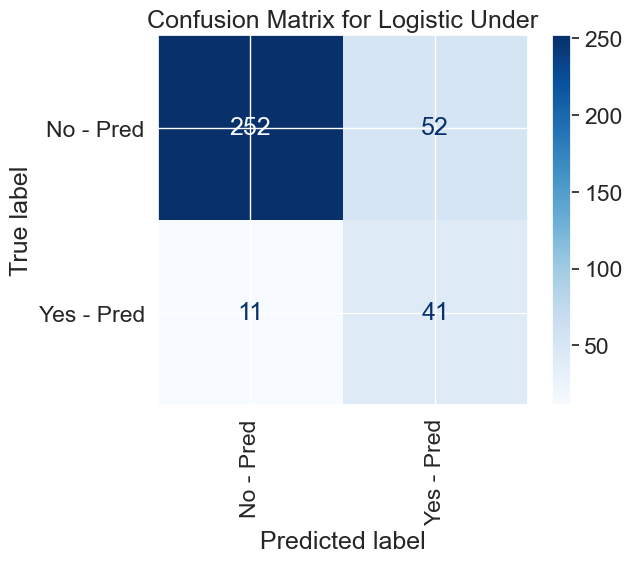

Classification report for Logistic Under:
               precision    recall  f1-score     support
No - True      0.958175  0.828947  0.888889  304.000000
Yes - True     0.440860  0.788462  0.565517   52.000000
accuracy       0.823034  0.823034  0.823034    0.823034
macro avg      0.699518  0.808704  0.727203  356.000000
weighted avg   0.882612  0.823034  0.841655  356.000000


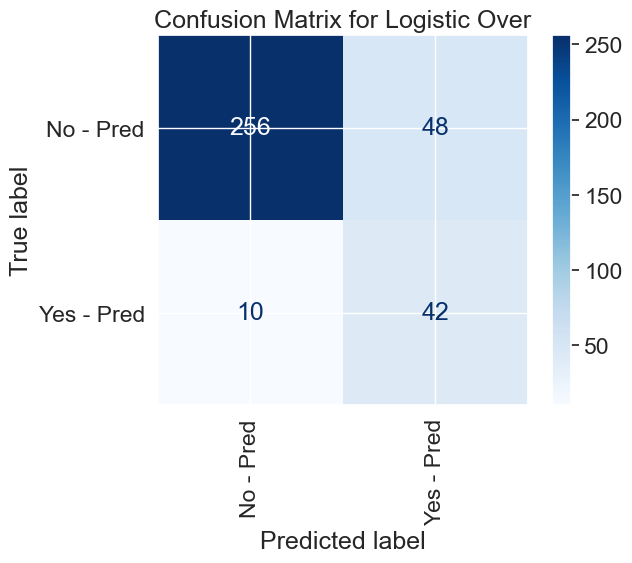

Classification report for Logistic Over:
               precision    recall  f1-score     support
No - True      0.962406  0.842105  0.898246  304.000000
Yes - True     0.466667  0.807692  0.591549   52.000000
accuracy       0.837079  0.837079  0.837079    0.837079
macro avg      0.714536  0.824899  0.744897  356.000000
weighted avg   0.889995  0.837079  0.853447  356.000000


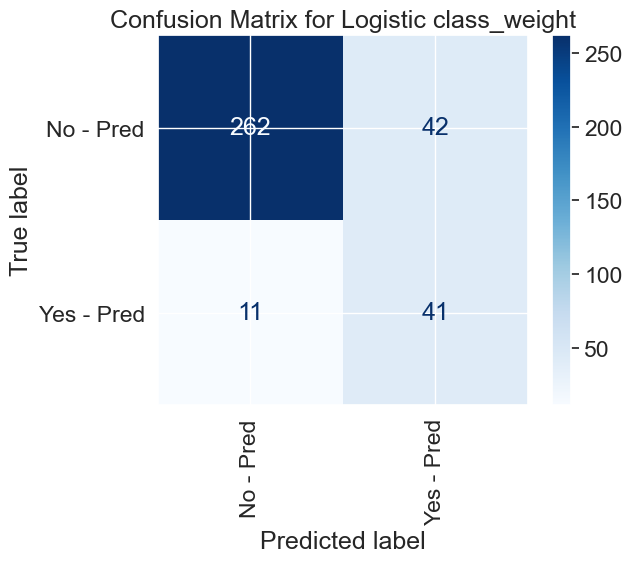

Classification report for Logistic class_weight:
               precision    recall  f1-score     support
No - True      0.959707  0.861842  0.908146  304.000000
Yes - True     0.493976  0.788462  0.607407   52.000000
accuracy       0.851124  0.851124  0.851124    0.851124
macro avg      0.726841  0.825152  0.757776  356.000000
weighted avg   0.891679  0.851124  0.864218  356.000000


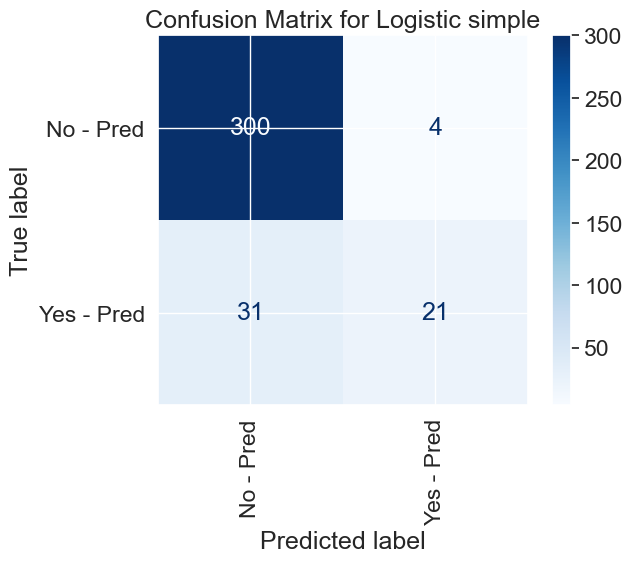

Classification report for Logistic simple:
               precision    recall  f1-score     support
No - True      0.906344  0.986842  0.944882  304.000000
Yes - True     0.840000  0.403846  0.545455   52.000000
accuracy       0.901685  0.901685  0.901685    0.901685
macro avg      0.873172  0.695344  0.745168  356.000000
weighted avg   0.896654  0.901685  0.886539  356.000000


In [232]:
predictions = [y_pred_log_under, y_pred_log_over, y_pred, y_pred_nb]
model_names = ['Logistic Under', 'Logistic Over', 'Logistic class_weight', 'Logistic simple']
true_label = y_test

for prediction, model_name in zip(predictions, model_names):
    cm = confusion_matrix(true_label, prediction)

    # Rename columns to predicted values - 0 = Malignant, 1 = Benign
    # Rename rows to real values - 0 = Malignant, 1 = Benign
    class_names = ['No - True', 'Yes - True']
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No - Pred', 'Yes - Pred'])
    disp.plot(cmap='Blues', xticks_rotation='vertical')

    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    sns.set(font_scale=1.5)
    report = classification_report(true_label, prediction, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print(f'Classification report for {model_name}:\n', df_report)

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# If I don't do anything to transform the data so that they are less imbalanced, I have a higher accuracy score, but a very low recall score.
# So low that I cannot identify a malignant website in 60% of the cases (see classification report for the simple logistic regression model).
# If I apply, a technique to artificially balance the data (oversampling, undersampling or applying the class_weight paramether), the recall score improves.
# I can identify correctly around 80% of the total number of malignant websites, but my precision sinks (the model classify many more benign websites as malignant ones).
# Thinking about the aim of the model, which is to identify correctly the malignant websites, the strategy that makes sense in this case is to try to balance the data and increase the recall power of the model.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [233]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [245]:
# Your code here:
knn_model_over = knn_model.fit(X_train_over, y_train_over)
knn_model_under = knn_model.fit(X_train_under, y_train_under)
knn_model_simple = knn_model.fit(X_train_scaled, y_train)

In [246]:
y_pred_knn_over = knn_model_over.predict(X_test_scaled)
y_pred_knn_under = knn_model_under.predict(X_test_scaled)
y_pred_knn = knn_model_simple.predict(X_test_scaled)

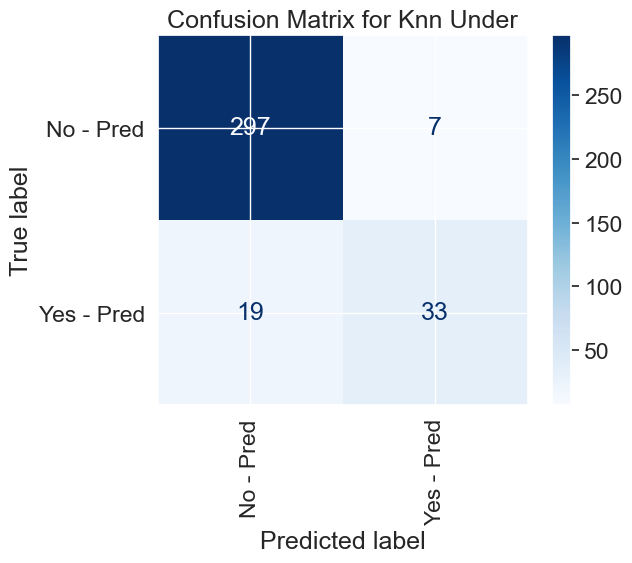

Classification report for Knn Under:
               precision    recall  f1-score     support
No - True      0.939873  0.976974  0.958065  304.000000
Yes - True     0.825000  0.634615  0.717391   52.000000
accuracy       0.926966  0.926966  0.926966    0.926966
macro avg      0.882437  0.805795  0.837728  356.000000
weighted avg   0.923094  0.926966  0.922910  356.000000


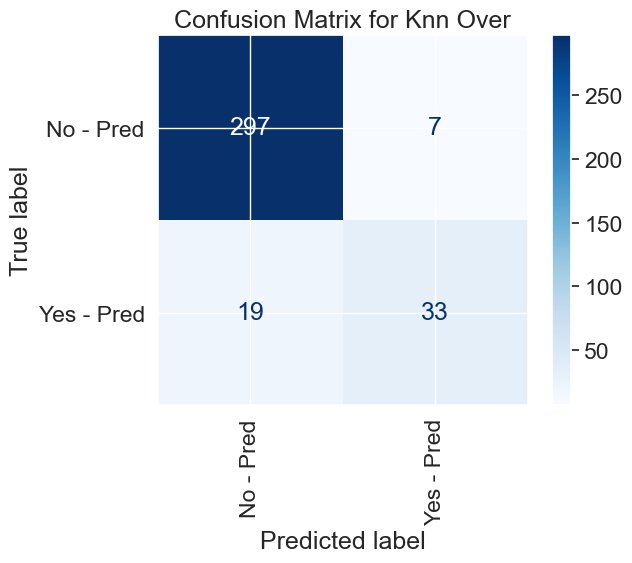

Classification report for Knn Over:
               precision    recall  f1-score     support
No - True      0.939873  0.976974  0.958065  304.000000
Yes - True     0.825000  0.634615  0.717391   52.000000
accuracy       0.926966  0.926966  0.926966    0.926966
macro avg      0.882437  0.805795  0.837728  356.000000
weighted avg   0.923094  0.926966  0.922910  356.000000


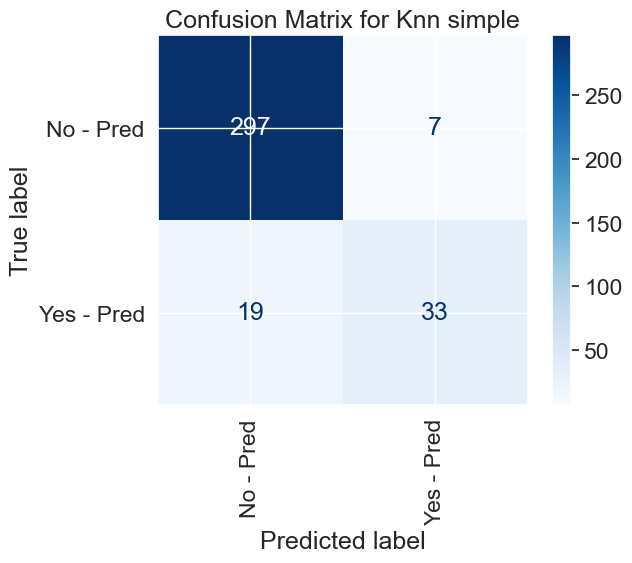

Classification report for Knn simple:
               precision    recall  f1-score     support
No - True      0.939873  0.976974  0.958065  304.000000
Yes - True     0.825000  0.634615  0.717391   52.000000
accuracy       0.926966  0.926966  0.926966    0.926966
macro avg      0.882437  0.805795  0.837728  356.000000
weighted avg   0.923094  0.926966  0.922910  356.000000


In [247]:
predictions_knn_3 = [y_pred_knn_under, y_pred_knn_over, y_pred_knn]
model_names_knn = ['Knn Under', 'Knn Over', 'Knn simple']
true_label = y_test

for prediction, model_name in zip(predictions_knn_3, model_names_knn):
    cm = confusion_matrix(true_label, prediction)

    # Rename columns to predicted values - 0 = Malignant, 1 = Benign
    # Rename rows to real values - 0 = Malignant, 1 = Benign
    class_names = ['No - True', 'Yes - True']
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No - Pred', 'Yes - Pred'])
    disp.plot(cmap='Blues', xticks_rotation='vertical')

    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    sns.set(font_scale=1.5)
    report = classification_report(true_label, prediction, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print(f'Classification report for {model_name}:\n', df_report)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [248]:
# Your code here:
knn_model2 = KNeighborsClassifier(n_neighbors=5)

In [249]:
knn_model_over2 = knn_model2.fit(X_train_over, y_train_over)
knn_model_under2 = knn_model2.fit(X_train_under, y_train_under)
knn_model_simple2 = knn_model2.fit(X_train_scaled, y_train)

In [250]:
y_pred_knn_over2 = knn_model_over2.predict(X_test_scaled)
y_pred_knn_under2 = knn_model_under2.predict(X_test_scaled)
y_pred_knn2 = knn_model_simple2.predict(X_test_scaled)

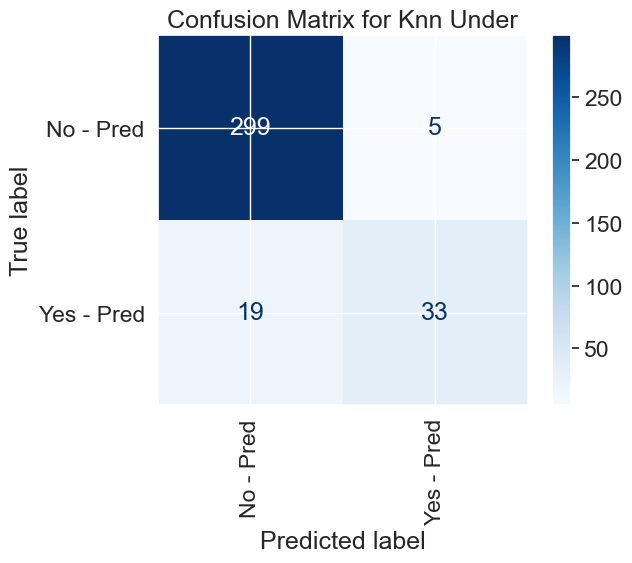

Classification report for Knn Under:
               precision    recall  f1-score     support
No - True      0.940252  0.983553  0.961415  304.000000
Yes - True     0.868421  0.634615  0.733333   52.000000
accuracy       0.932584  0.932584  0.932584    0.932584
macro avg      0.904336  0.809084  0.847374  356.000000
weighted avg   0.929759  0.932584  0.928100  356.000000


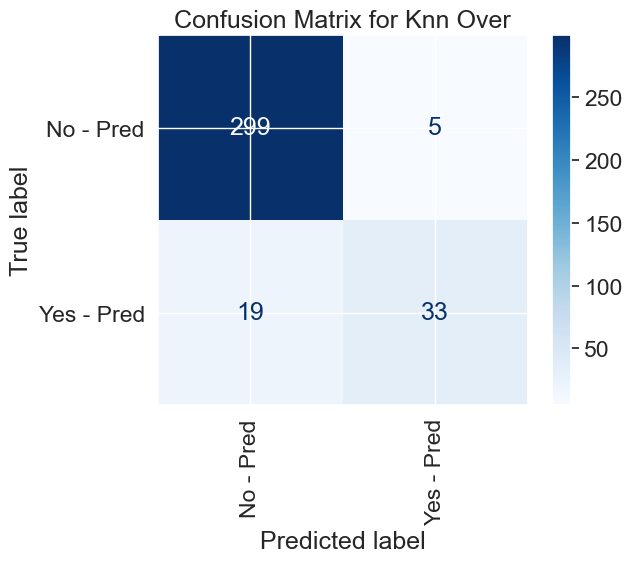

Classification report for Knn Over:
               precision    recall  f1-score     support
No - True      0.940252  0.983553  0.961415  304.000000
Yes - True     0.868421  0.634615  0.733333   52.000000
accuracy       0.932584  0.932584  0.932584    0.932584
macro avg      0.904336  0.809084  0.847374  356.000000
weighted avg   0.929759  0.932584  0.928100  356.000000


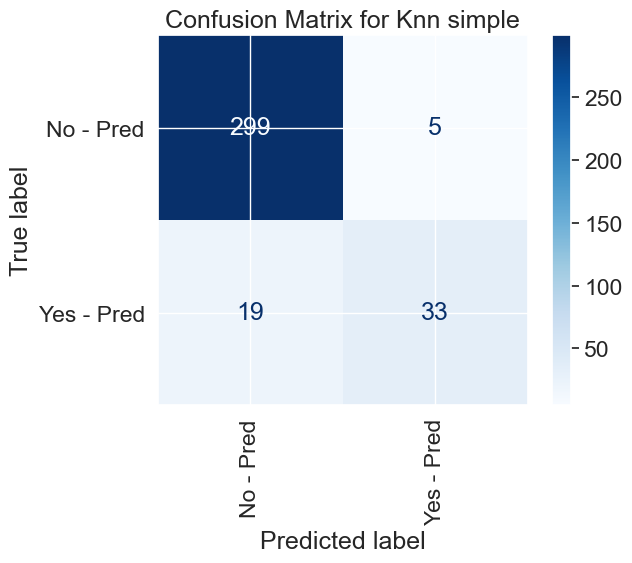

Classification report for Knn simple:
               precision    recall  f1-score     support
No - True      0.940252  0.983553  0.961415  304.000000
Yes - True     0.868421  0.634615  0.733333   52.000000
accuracy       0.932584  0.932584  0.932584    0.932584
macro avg      0.904336  0.809084  0.847374  356.000000
weighted avg   0.929759  0.932584  0.928100  356.000000


In [251]:
predictions_knn_5 = [y_pred_knn_under2, y_pred_knn_over2, y_pred_knn2]
model_names_knn = ['Knn Under', 'Knn Over', 'Knn simple']
true_label = y_test

for prediction, model_name in zip(predictions_knn_5, model_names_knn):
    cm = confusion_matrix(true_label, prediction)

    # Rename columns to predicted values - 0 = Malignant, 1 = Benign
    # Rename rows to real values - 0 = Malignant, 1 = Benign
    class_names = ['No - True', 'Yes - True']
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No - Pred', 'Yes - Pred'])
    disp.plot(cmap='Blues', xticks_rotation='vertical')

    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    sns.set(font_scale=1.5)
    report = classification_report(true_label, prediction, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print(f'Classification report for {model_name}:\n', df_report)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# There is an improvement in the accuracy score when increasing k from 3 to 5 (from 0.92 to 0.93).
# The interesting thing is that the recall score for the malignant websites with the knn model stays almost the same (63%) 
# across both versions (3 and 5 neighbours) and does not depend on balancing strategies.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# See the code above...